In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
def lv_rhs(x, y, alpha, beta, gamma, delta):
    """ロトカ＝ヴォルテラ方程式の右辺"""
    dx = alpha*x - beta*x*y
    dy = delta*x*y - gamma*y
    return dx, dy


In [4]:
# alpha, beta, gamma, delta = 1.0, 0.1, 1.5, 0.075
alpha, beta, gamma, delta = 1.0, 0.05, 1.0, 0.05

x = np.linspace(0, 40, 25)
y = np.linspace(0, 40, 25)
X, Y = np.meshgrid(x, y)
U, V = lv_rhs(X, Y, alpha, beta, gamma, delta)

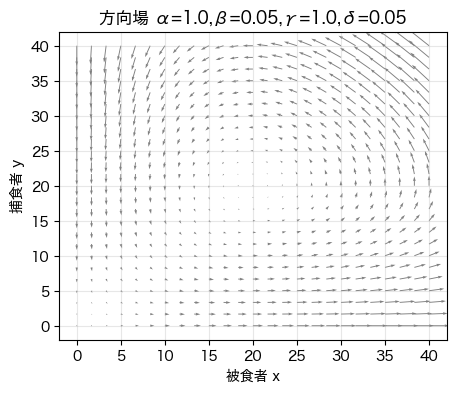

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
ax.quiver(X, Y, U, V, color='gray', angles='xy')
ax.set_xlabel("被食者 x"); ax.set_ylabel("捕食者 y")
ax.set_title(f"方向場 α={alpha},β={beta},γ={gamma},δ={delta}")
plt.grid(True, alpha=0.3)
plt.savefig(f"6_phase_α={alpha}_β={beta}_γ={gamma}_δ={delta}.png")
plt.show()

In [9]:
def euler_lv(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1] - t[0]
    for k in range(len(t) - 1):
        dx, dy = f(X[k], Y[k], alpha, beta, gamma, delta)        # 現在の傾きを評価
        X[k+1] = X[k] + h * dx        # 被食者の更新
        Y[k+1] = Y[k] + h * dy        # 捕食者の更新
    return X, Y

t = np.linspace(0, 100, 20000)
x0, y0 = 21,21
X, Y = euler_lv(lv_rhs, x0, y0, t)

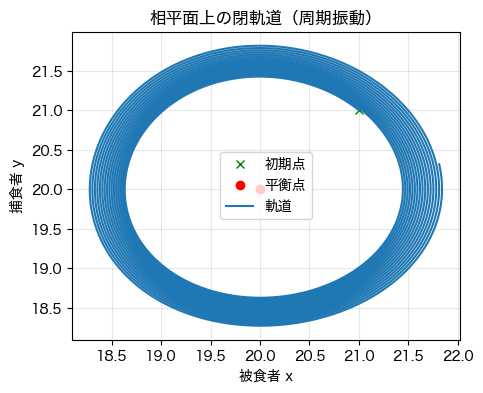

In [10]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x0, y0, 'gx', label='初期点')
ax.plot(gamma/delta, alpha/beta, 'ro', label='平衡点')
ax.plot(X, Y, label='軌道')
ax.set_xlabel("被食者 x"); ax.set_ylabel("捕食者 y")
ax.legend(); ax.grid(True, alpha=0.3)
ax.set_title("相平面上の閉軌道（周期振動）")
plt.savefig(f"6_orbit_α={alpha}_β={beta}_γ={gamma}_δ={delta}_x0={x0}_y0={y0}.png")
plt.show()

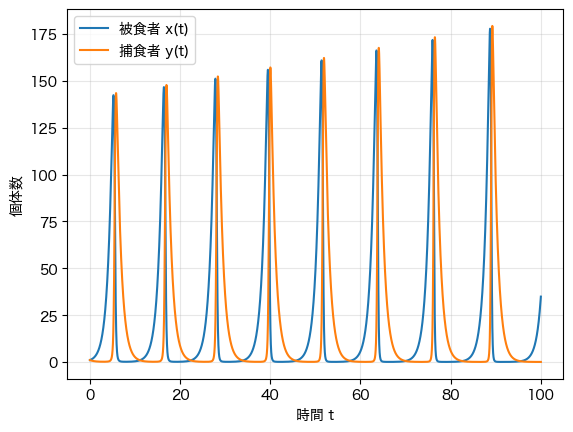

In [71]:
fig, ax = plt.subplots()
ax.plot(t, X, label="被食者 x(t)")
ax.plot(t, Y, label="捕食者 y(t)")
ax.set_xlabel("時間 t"); ax.set_ylabel("個体数")
ax.legend(); ax.grid(True, alpha=0.3)
plt.savefig(f"6_sol_α={alpha}_β={beta}_γ={gamma}_δ={delta}_x0={x0}_y0={y0}.png")
plt.show()

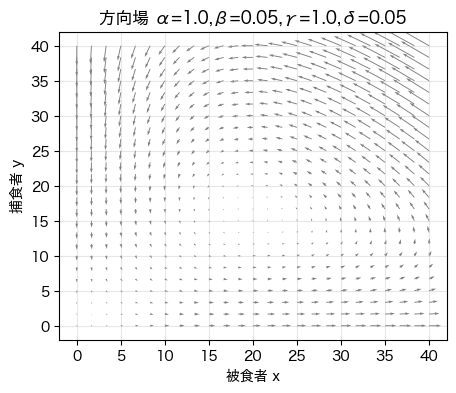

In [72]:
# alpha, beta, gamma, delta = 1.0, 0.1, 1.5, 0.075
alpha, beta, gamma, delta = 1.0, 0.05, 1.0, 0.05
xmax = 100

def mlv_rhs(x, y, alpha, beta, gamma, delta, xmax):
    """ロトカ＝ヴォルテラ方程式の右辺"""
    dx = alpha*x*(1-x/xmax) - beta*x*y
    dy = delta*x*y - gamma*y
    return dx, dy

x = np.linspace(0, 40, 25)
y = np.linspace(0, 40, 25)
X, Y = np.meshgrid(x, y)
U, V = mlv_rhs(X, Y, alpha, beta, gamma, delta, xmax)

fig, ax = plt.subplots(figsize=(5,4))
ax.quiver(X, Y, U, V, color='gray', angles='xy')
ax.set_xlabel("被食者 x"); ax.set_ylabel("捕食者 y")
ax.set_title(f"方向場 α={alpha},β={beta},γ={gamma},δ={delta}")
plt.grid(True, alpha=0.3)
plt.savefig(f"6_mlv_phase_α={alpha}_β={beta}_γ={gamma}_δ={delta}.png")
plt.show()

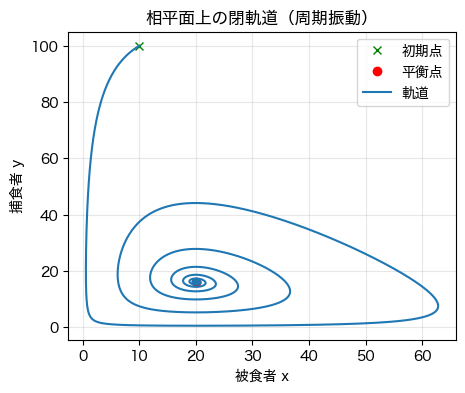

In [73]:
t = np.linspace(0, 100, 20000)
x0, y0 = 10, 100

def euler_mlv(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1] - t[0]
    for k in range(len(t) - 1):
        dx, dy = f(X[k], Y[k], alpha, beta, gamma, delta, xmax)        # 現在の傾きを評価
        X[k+1] = X[k] + h * dx        # 被食者の更新
        Y[k+1] = Y[k] + h * dy        # 捕食者の更新
    return X, Y

X, Y = euler_mlv(mlv_rhs, x0, y0, t)

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x0, y0, 'gx', label='初期点')
ax.plot(gamma/delta, alpha/beta*(1-gamma/delta/xmax), 'ro', label='平衡点')
ax.plot(X, Y, label='軌道')
ax.set_xlabel("被食者 x"); ax.set_ylabel("捕食者 y")
ax.legend(); ax.grid(True, alpha=0.3)
ax.set_title("相平面上の閉軌道（周期振動）")
plt.savefig(f"6_mlv_orbit_α={alpha}_β={beta}_γ={gamma}_δ={delta}_x0={x0}_y0={y0}.png")
plt.show()